# Exploratory Data Analysis

In [1]:
import requests, json, time, re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

/Users/mintaekhong/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Prepare dataframes for EDA

In [2]:
df_old = pd.read_csv('../datasets/df_old.csv', lineterminator= '\n', index_col = False)

In [3]:
df_old.shape

(14012, 5)

In [4]:
df_old.drop('Unnamed: 0', axis = 1, inplace = True)

In [17]:
df_old.head(10)

,title,selftext,all,in
0,Delicious Blue Bottle Coffee,,Delicious Blue Bottle Coffee,0
1,PSA: Looking for an inexpensive alternative to...,,PSA: Looking for an inexpensive alternative to...,0
2,Is there a feasible way to store coffee for lo...,I just received two 2 pound bags of coffee for...,Is there a feasible way to store coffee for lo...,0
3,A shot in the dark (name that coffee),I want to get some coffee for a very left-lean...,A shot in the dark (name that coffee) I want t...,0
4,[Serious question] How can I keep drinking cof...,This isn't a joke at all. I'm 100% serious. I ...,[Serious question] How can I keep drinking cof...,0
5,2014 Coffee Collage,,2014 Coffee Collage,0
6,What's your favorite coffee producing country/...,What countries and regions produce your favori...,What's your favorite coffee producing country/...,0
7,To-go mug for Keurig mini.,So I got a Keurig for Christmas in order to ma...,To-go mug for Keurig mini. So I got a Keurig f...,0
8,Cold Bruer Help,I set up my new Cold Bruer to brew overnight l...,Cold Bruer Help I set up my new Cold Bruer to ...,0
9,Have you ever made a decent cup with folgers?,,Have you ever made a decent cup with folgers?,0


Seems like we have some NaN's. We will replace them with a space

In [6]:
df_old.fillna(' ', inplace = True);

In [7]:
df_old.shape

(14012, 4)

In [8]:
df_old['in'].value_counts()

0    14012
Name: in, dtype: int64

Repeat same process for df_new

In [9]:
df_new = pd.read_csv('../datasets/df_new.csv')

In [10]:
df_new.drop('Unnamed: 0', axis = 1, inplace = True)

In [11]:
df_new.head(10)

,title,selftext,all,in
0,Is there any hope with automatic coffee brewers?,I've been doing pour-overs for a while and rea...,Is there any hope with automatic coffee brewer...,1
1,Is instant coffee a scam?,I tried drinking instant coffee espresso powde...,Is instant coffee a scam? I tried drinking ins...,1
2,DIY Drip Coffee Maker?,I've been in a DIY mood lately. I would love ...,DIY Drip Coffee Maker? I've been in a DIY mood...,1
3,Does anyone else feel like they don’t feel the...,"I drink a LOT of coffee, and I was wondering i...",Does anyone else feel like they don’t feel the...,1
4,Never had coffee,"Hi folks, I know this may sound crazy, but I'v...","Never had coffee Hi folks, I know this may sou...",1
5,"[news] that extra cup of java is good for you,...",NaN,"[news] that extra cup of java is good for you,...",1
6,Best coffee to buy in Seattle?,So I’ll be heading to the emerald city one wee...,Best coffee to buy in Seattle? So I’ll be head...,1
7,Chemex drinkers - What’s your trick?,I just got an 8 cup Chemex and I’m having trou...,Chemex drinkers - What’s your trick? I just go...,1
8,[MOD] The Official Noob-Tastic Question Fest,Welcome to the weekly /r/Coffee question threa...,[MOD] The Official Noob-Tastic Question Fest W...,1
9,[MOD] What have you been brewing this week?/ C...,Hey everyone!\n\nWelcome back to the weekly /r...,[MOD] What have you been brewing this week?/ C...,1


In [12]:
df_new.shape

(18033, 4)

In [13]:
df_new['in'].value_counts()

1    18033
Name: in, dtype: int64

In [14]:
df_new.fillna(' ', inplace=True);

We now join the two dataframes to perform preprocessing steps

In [18]:
df_all = pd.concat([df_old, df_new])

In [19]:
df_all.shape

(32045, 4)

### Pre-Processing (RegularExpressions, Tokenizing, Lemmatizing/Stemming, Cleaning (i.e. removing HTML/URL)

In [20]:
df_all.head()

,title,selftext,all,in
0,Delicious Blue Bottle Coffee,,Delicious Blue Bottle Coffee,0
1,PSA: Looking for an inexpensive alternative to...,,PSA: Looking for an inexpensive alternative to...,0
2,Is there a feasible way to store coffee for lo...,I just received two 2 pound bags of coffee for...,Is there a feasible way to store coffee for lo...,0
3,A shot in the dark (name that coffee),I want to get some coffee for a very left-lean...,A shot in the dark (name that coffee) I want t...,0
4,[Serious question] How can I keep drinking cof...,This isn't a joke at all. I'm 100% serious. I ...,[Serious question] How can I keep drinking cof...,0


### Using regex

In [28]:
import re

In [29]:
df_all['all'].map(lambda x: re.findall('\[\w+\]', str(x).lower()));

Replace textx within square brackets with an empty space

In [30]:
##Sqbracket
df_all['all_clean'] = df_all['all'].map(lambda x: re.sub('\[\w+\]', ' ', str(x).lower()))

Replace any URLs with an empty space; we do not desire to see 'https' as one of the most frequent word in our corpus and hence introduce unnecessary noise into our model.

In [31]:
##URLs
df_all['all_clean'] = df_all['all_clean'].map(lambda x: re.sub('http[s]?:\/\/[^\s]*', ' ', str(x).lower()))

Replace any numerical information with an empty space

In [32]:
##numbers
df_all['all_clean'] = df_all['all_clean'].map(lambda x: re.sub('\d', ' ', str(x).lower()))

In [33]:
df_all.head()

,title,selftext,all,in,all_clean
0,Delicious Blue Bottle Coffee,,Delicious Blue Bottle Coffee,0,delicious blue bottle coffee
1,PSA: Looking for an inexpensive alternative to...,,PSA: Looking for an inexpensive alternative to...,0,psa: looking for an inexpensive alternative to...
2,Is there a feasible way to store coffee for lo...,I just received two 2 pound bags of coffee for...,Is there a feasible way to store coffee for lo...,0,is there a feasible way to store coffee for lo...
3,A shot in the dark (name that coffee),I want to get some coffee for a very left-lean...,A shot in the dark (name that coffee) I want t...,0,a shot in the dark (name that coffee) i want t...
4,[Serious question] How can I keep drinking cof...,This isn't a joke at all. I'm 100% serious. I ...,[Serious question] How can I keep drinking cof...,0,[serious question] how can i keep drinking cof...


### Tokenize our documents

In [34]:
tokenizer = RegexpTokenizer(r'\w+')

In [35]:
df_all['all_tokenized'] = df_all['all_clean'].map(lambda x: tokenizer.tokenize(x))

In [36]:
df_all.head()

,title,selftext,all,in,all_clean,all_tokenized
0,Delicious Blue Bottle Coffee,,Delicious Blue Bottle Coffee,0,delicious blue bottle coffee,"[delicious, blue, bottle, coffee]"
1,PSA: Looking for an inexpensive alternative to...,,PSA: Looking for an inexpensive alternative to...,0,psa: looking for an inexpensive alternative to...,"[psa, looking, for, an, inexpensive, alternati..."
2,Is there a feasible way to store coffee for lo...,I just received two 2 pound bags of coffee for...,Is there a feasible way to store coffee for lo...,0,is there a feasible way to store coffee for lo...,"[is, there, a, feasible, way, to, store, coffe..."
3,A shot in the dark (name that coffee),I want to get some coffee for a very left-lean...,A shot in the dark (name that coffee) I want t...,0,a shot in the dark (name that coffee) i want t...,"[a, shot, in, the, dark, name, that, coffee, i..."
4,[Serious question] How can I keep drinking cof...,This isn't a joke at all. I'm 100% serious. I ...,[Serious question] How can I keep drinking cof...,0,[serious question] how can i keep drinking cof...,"[serious, question, how, can, i, keep, drinkin..."


### Lemmatize our documents

Before we perform our TFIDF transformation, we should lemmatize our words to get them into its respective base form. 

We instantiate a wordnetlemmatizer that allows us to lemmatize the passed in document.

In [37]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

Create a column of the lemmatized versions of the all_tokenized column

In [38]:
df_all['all_lemm'] = df_all['all_tokenized'].map(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))

In [39]:
df_all.head()

,title,selftext,all,in,all_clean,all_tokenized,all_lemm
0,Delicious Blue Bottle Coffee,,Delicious Blue Bottle Coffee,0,delicious blue bottle coffee,"[delicious, blue, bottle, coffee]",delicious blue bottle coffee
1,PSA: Looking for an inexpensive alternative to...,,PSA: Looking for an inexpensive alternative to...,0,psa: looking for an inexpensive alternative to...,"[psa, looking, for, an, inexpensive, alternati...",psa looking for an inexpensive alternative to ...
2,Is there a feasible way to store coffee for lo...,I just received two 2 pound bags of coffee for...,Is there a feasible way to store coffee for lo...,0,is there a feasible way to store coffee for lo...,"[is, there, a, feasible, way, to, store, coffe...",is there a feasible way to store coffee for lo...
3,A shot in the dark (name that coffee),I want to get some coffee for a very left-lean...,A shot in the dark (name that coffee) I want t...,0,a shot in the dark (name that coffee) i want t...,"[a, shot, in, the, dark, name, that, coffee, i...",a shot in the dark name that coffee i want to ...
4,[Serious question] How can I keep drinking cof...,This isn't a joke at all. I'm 100% serious. I ...,[Serious question] How can I keep drinking cof...,0,[serious question] how can i keep drinking cof...,"[serious, question, how, can, i, keep, drinkin...",serious question how can i keep drinking coffe...


### Stemming

In [40]:
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()

In [41]:
df_all['all_stem'] = df_all['all_tokenized'].map(lambda x: ' '.join([p_stemmer.stem(word) for word in x]))

In [42]:
df_all.head()

,title,selftext,all,in,all_clean,all_tokenized,all_lemm,all_stem
0,Delicious Blue Bottle Coffee,,Delicious Blue Bottle Coffee,0,delicious blue bottle coffee,"[delicious, blue, bottle, coffee]",delicious blue bottle coffee,delici blue bottl coffe
1,PSA: Looking for an inexpensive alternative to...,,PSA: Looking for an inexpensive alternative to...,0,psa: looking for an inexpensive alternative to...,"[psa, looking, for, an, inexpensive, alternati...",psa looking for an inexpensive alternative to ...,psa look for an inexpens altern to a dedic goo...
2,Is there a feasible way to store coffee for lo...,I just received two 2 pound bags of coffee for...,Is there a feasible way to store coffee for lo...,0,is there a feasible way to store coffee for lo...,"[is, there, a, feasible, way, to, store, coffe...",is there a feasible way to store coffee for lo...,is there a feasibl way to store coffe for long...
3,A shot in the dark (name that coffee),I want to get some coffee for a very left-lean...,A shot in the dark (name that coffee) I want t...,0,a shot in the dark (name that coffee) i want t...,"[a, shot, in, the, dark, name, that, coffee, i...",a shot in the dark name that coffee i want to ...,a shot in the dark name that coffe i want to g...
4,[Serious question] How can I keep drinking cof...,This isn't a joke at all. I'm 100% serious. I ...,[Serious question] How can I keep drinking cof...,0,[serious question] how can i keep drinking cof...,"[serious, question, how, can, i, keep, drinkin...",serious question how can i keep drinking coffe...,seriou question how can i keep drink coffe wit...


I investigated both lemmatizing and stemming my posts and it seems that stemming is too aggressive. For example, the word 'differences' becomes 'differ' when stemming versus 'difference' with lemmatizing. I will proceed with the lemmatized version for my analysis as I do not want to lose too much meaning behind the diction of posts/documents.

In [43]:
df_all['char_count'] = df_all['all_lemm'].map(len)

In [44]:
df_all['word_count'] = df_all['all_lemm'].map(lambda x: len(x.split()))

In [45]:
df_all.head()

,title,selftext,all,in,all_clean,all_tokenized,all_lemm,all_stem,char_count,word_count
0,Delicious Blue Bottle Coffee,,Delicious Blue Bottle Coffee,0,delicious blue bottle coffee,"[delicious, blue, bottle, coffee]",delicious blue bottle coffee,delici blue bottl coffe,28,4
1,PSA: Looking for an inexpensive alternative to...,,PSA: Looking for an inexpensive alternative to...,0,psa: looking for an inexpensive alternative to...,"[psa, looking, for, an, inexpensive, alternati...",psa looking for an inexpensive alternative to ...,psa look for an inexpens altern to a dedic goo...,121,18
2,Is there a feasible way to store coffee for lo...,I just received two 2 pound bags of coffee for...,Is there a feasible way to store coffee for lo...,0,is there a feasible way to store coffee for lo...,"[is, there, a, feasible, way, to, store, coffe...",is there a feasible way to store coffee for lo...,is there a feasibl way to store coffe for long...,371,72
3,A shot in the dark (name that coffee),I want to get some coffee for a very left-lean...,A shot in the dark (name that coffee) I want t...,0,a shot in the dark (name that coffee) i want t...,"[a, shot, in, the, dark, name, that, coffee, i...",a shot in the dark name that coffee i want to ...,a shot in the dark name that coffe i want to g...,300,57
4,[Serious question] How can I keep drinking cof...,This isn't a joke at all. I'm 100% serious. I ...,[Serious question] How can I keep drinking cof...,0,[serious question] how can i keep drinking cof...,"[serious, question, how, can, i, keep, drinkin...",serious question how can i keep drinking coffe...,seriou question how can i keep drink coffe wit...,439,92


Text(0, 0.5, 'Count')

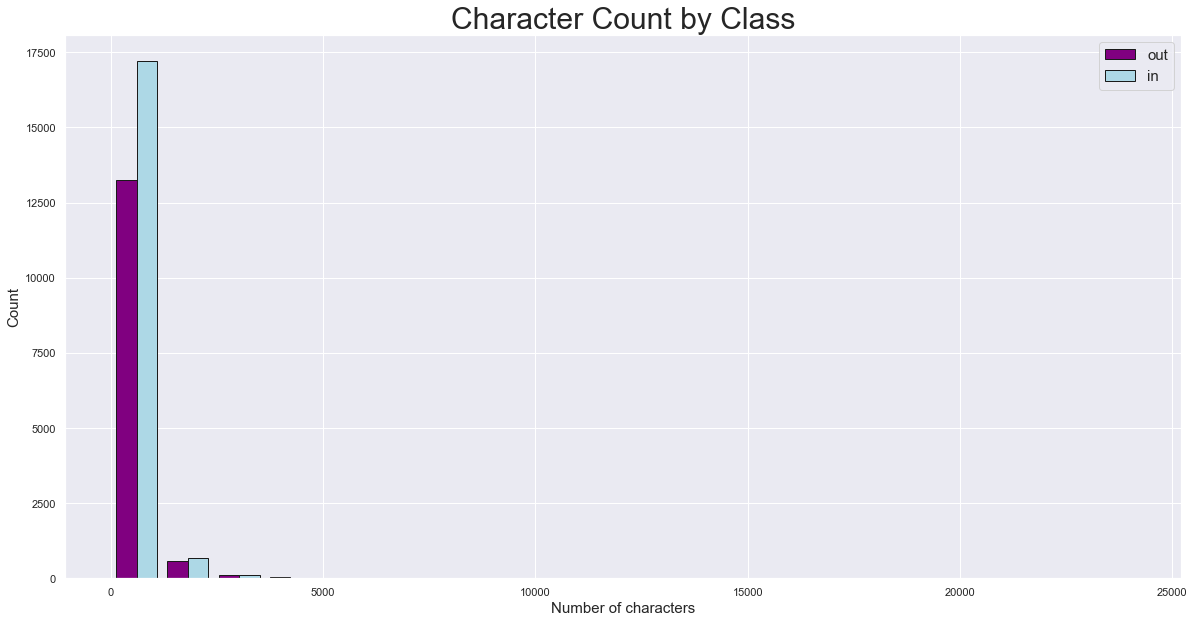

In [51]:
plt.figure(figsize=(20,10))
plt.hist([df_all[df_all['in']==0]['char_count'],
          df_all[df_all['in']==1]['char_count']],
         bins=20, color=['purple','lightblue'], ec='k') ##ec = edge color
plt.title('Character Count by Class', fontsize=30)
plt.legend(['out', 'in'], fontsize = 15)
plt.xlabel('Number of characters', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

We see that many posts have less than 2500 characters; we also observe that the newer posts (dated from 12/1/17 to 12/1/18) seem to have a higher count of posts

Text(0, 0.5, 'Count')

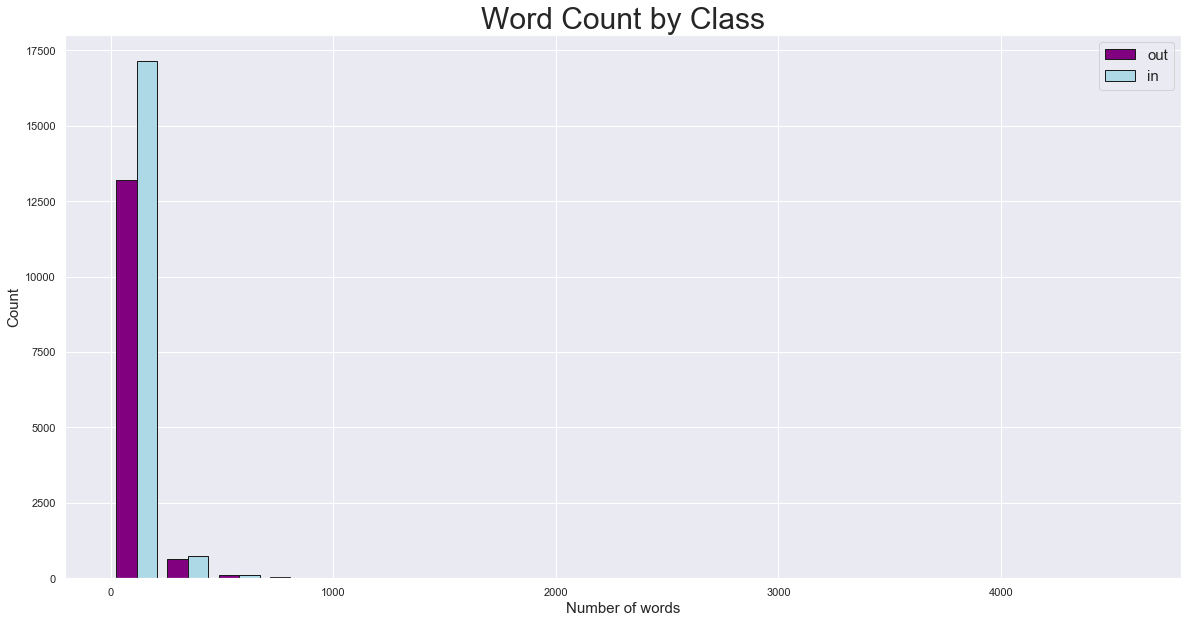

In [53]:
plt.figure(figsize=(20,10))
plt.hist([df_all[df_all['in']==0]['word_count'],
          df_all[df_all['in']==1]['word_count']],
         bins=20, color=['purple','lightblue'], ec='k') ##ec = edge color
plt.title('Word Count by Class', fontsize=30)
plt.legend(['out', 'in'], fontsize = 15)
plt.xlabel('Number of words', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

A similar narrative to the character count: we observe that the newer posts (dated from 12/1/17 to 12/1/18) have a higher count of words in a given post

## CountVectorize

To conduct more robust EDA we utilize CountVectorizer to convert our posts into vector representations whereby each document/post is now defined in a vector space by the words that comprise the post and the frequency at which they occur.

In [55]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

custom_stop_words = list(ENGLISH_STOP_WORDS)
custom_stop_words.append('ve')
custom_stop_words.append('wa')
custom_stop_words.append('just')
custom_stop_words.append('don')
custom_stop_words.append('amp')
custom_stop_words.append('gt')

According to the sklearn documentation, countvectorizer converts a collection of text documents to a matrix of token counts; this creates a sparse representation of the counts using scipy.sparse.csr_matrix. The countvectorizer method is a bag of words approach where a text is represented as the bag of its words, disregarding grammar and even word order but keeping multiplicity

We instantiate a CountVectorizer class with the following parameters:
- `ngram_range` of (1,2): we want to ensure that we keep the context of words in tact. For example the word 'French' may appear in our document which may not be the most beneficial but once we keep the context in place of 'French roast' the word has more meaning.
- `stop_words` of custom_stop_words: After first round of countvectorizing and exploring the data, I realized that there were many words that appeared frequently due to lemmatization. We filter these words that carry no meaning through the customized stop words.
- `min_df` of 15: When building the vocabulary, ignore terms that have a document frequency strictly lower than the given threshold. With a min_df set to 15, we will ignore words that does not occur at least 15 times. 
- `max_df` of 1.0: We ignore terms that have a document frequency of greater than 100%; we want to avoid including terms that occur in all documents as they are likely to occur in the subreddits of different timeframe and will not help categorize between the two classes. 

In [56]:
cv = CountVectorizer(ngram_range=(1,2), 
                             stop_words = custom_stop_words, 
                             min_df = 15, 
                             max_df = 1.0)

In [57]:
term_mat = cv.fit_transform(df_all['all_lemm'])

In [58]:
term_df = pd.DataFrame(term_mat.toarray(), columns=cv.get_feature_names())

In [59]:
term_df.index = df_all['in']

In [60]:
term_df.head()

,_______,_______ ama,aa,ability,able,able brew,able buy,able drink,able help,able make,...,youtube video,yr,yuck,yummy,zassenhaus,zealand,zero,ziplock,zojirushi,zone
in,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text yticklabel objects>)

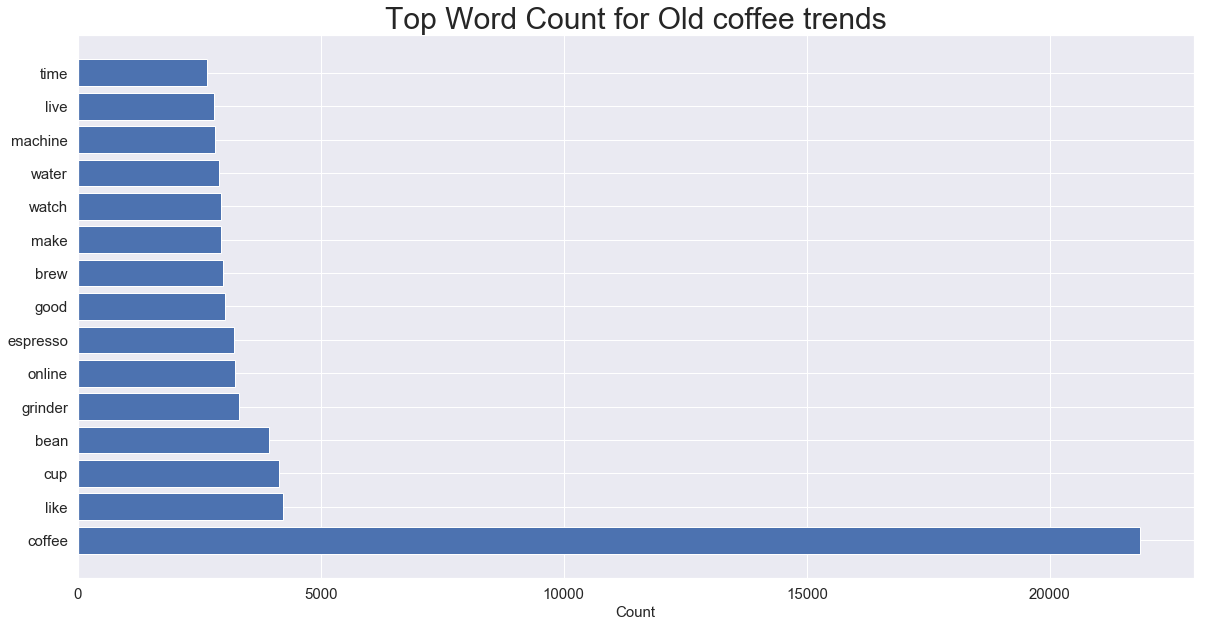

In [61]:
plt.figure(figsize=(20,10))
plt.barh(y = term_df[term_df.index == 0].sum().sort_values(ascending = False).head(15).index,
         width = term_df[term_df.index == 0].sum().sort_values(ascending = False).head(15))
plt.title('Top Word Count for Old coffee trends', fontsize = 30)
plt.xlabel('Count', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

The most talked about words in 2015 posts were the following: 'coffee', 'like', 'cup', 'bean', and 'grinder'. Not much to decipher other than people were rightfully talking about coffee related stuff on the coffee subreddit

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text yticklabel objects>)

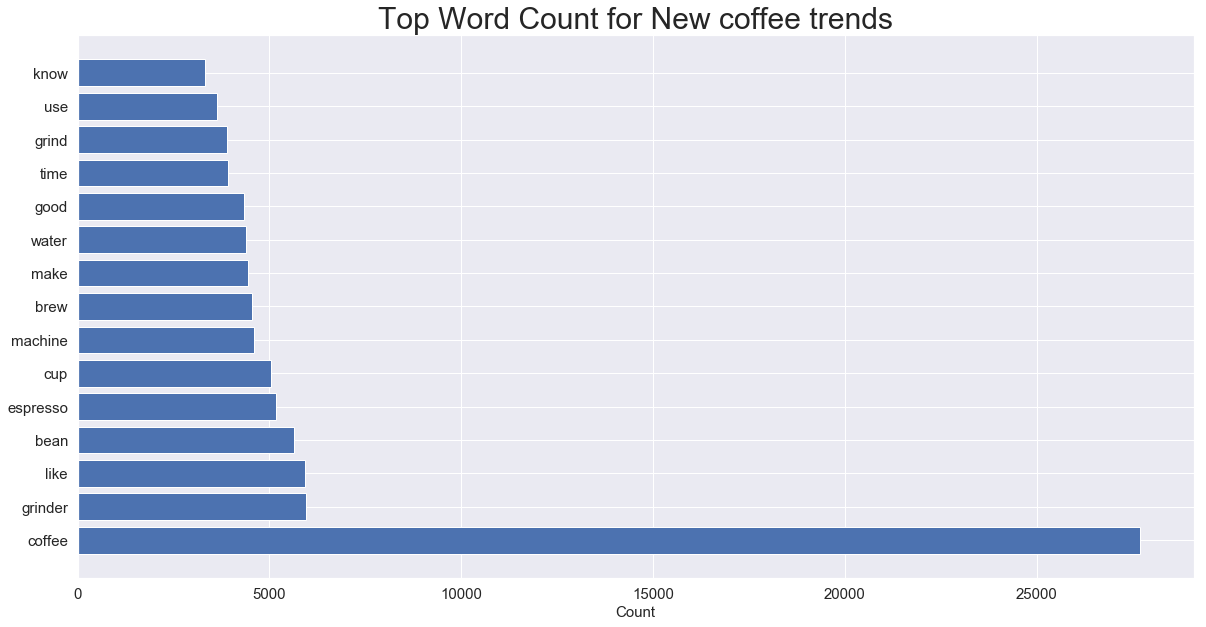

In [82]:
plt.figure(figsize=(20,10))
plt.barh(y = term_df[term_df.index == 1].sum().sort_values(ascending = False).head(15).index,
         width = term_df[term_df.index == 1].sum().sort_values(ascending = False).head(15))
plt.title('Top Word Count for New coffee trends', fontsize = 30)
plt.xlabel('Count', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

The most talked about words in 2018 posts were the following: 'coffee', 'grinder', 'like', 'bean', and 'espresso'. Again, not too much to decipher other than people were rightfully talking about coffee related stuff on the coffee subreddit. People seemed to be talking about 'grinder' more in 2017 than they did back in 2015.

### Explore counts of words

In [63]:
# Fit our CountVectorizer on the training data and transform training data.
X_in_counts = pd.DataFrame(cv.fit_transform(df_all['all_lemm']).todense(), ##todense is 'expanding' the compressed version (adding 0's)
                          columns = cv.get_feature_names())

X_in_counts = X_in_counts.astype(bool).astype(int)

Created a separate boolean dataframe where if a word appears in a document (once or x number of times), the count vectorizer counts it as 1 and not the number of times it appears in the document. This allows us to avoid noise from posts that may include a certain word many number of times.

In [64]:
df_all.shape

(32045, 10)

In [65]:
df_all.index.unique().size

18033

In [66]:
df_all.reset_index(drop=True, inplace = True)

In [67]:
df_all.index.unique().size

32045

In [68]:
X_in_0 = X_in_counts[df_all['in']==0]

In [69]:
X_in_1 = X_in_counts[df_all['in']==1]

In [70]:
X_in_0['ability'].value_counts()

0    13979
1       33
Name: ability, dtype: int64

In [71]:
diff = (X_in_1.sum() - X_in_0.sum())

Lost popularity

In [72]:
diff_df = pd.DataFrame(diff, columns = ['diff'])

In [73]:
diff_df.head()

,diff
_______,-13
_______ ama,-8
aa,15
ability,29
able,186


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text yticklabel objects>)

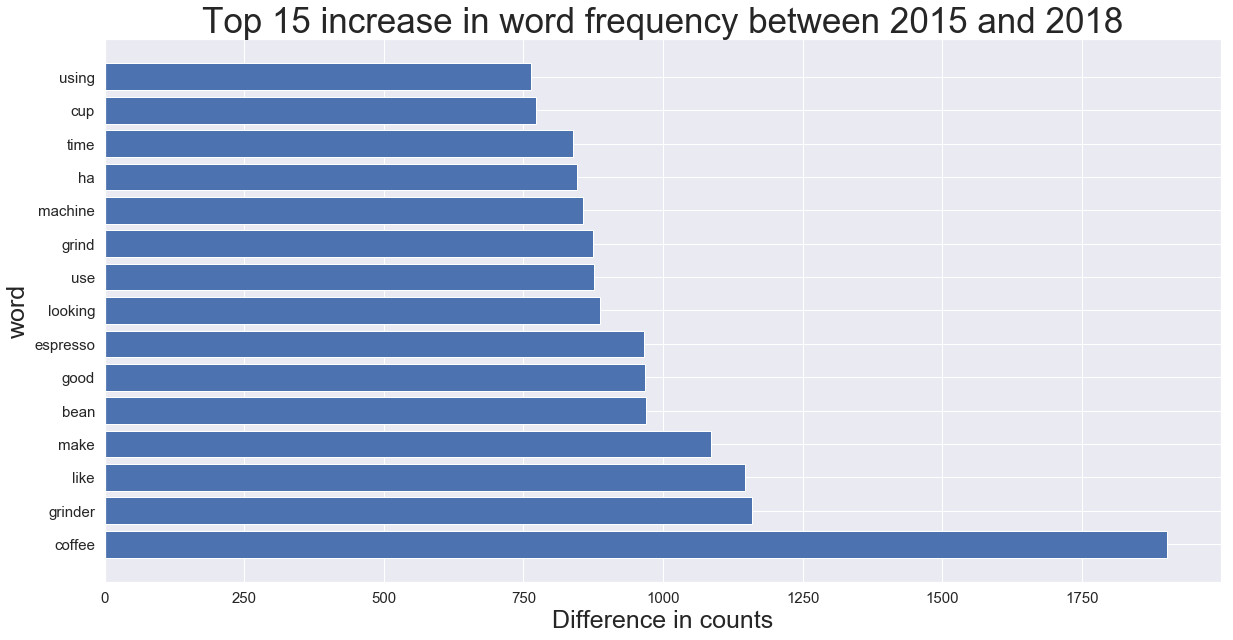

In [74]:
plt.figure(figsize=(20,10))
temp = diff_df.sort_values('diff', ascending=False).head(15)
plt.barh(temp.index, temp['diff'])
plt.title('Top 15 increase in word frequency between 2015 and 2018', fontsize=35)
plt.xlabel('Difference in counts', fontsize=25)
plt.ylabel('word', fontsize=25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

From the above, we can infer that individuals are talking more about coffee-related topics in 2018 than they were in 2015. This should be of interest for retailers looking to change their coffee machines offerings because it supports the fact that people are still interested in coffee and hence more likely to purchase coffee-related equipment. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text yticklabel objects>)

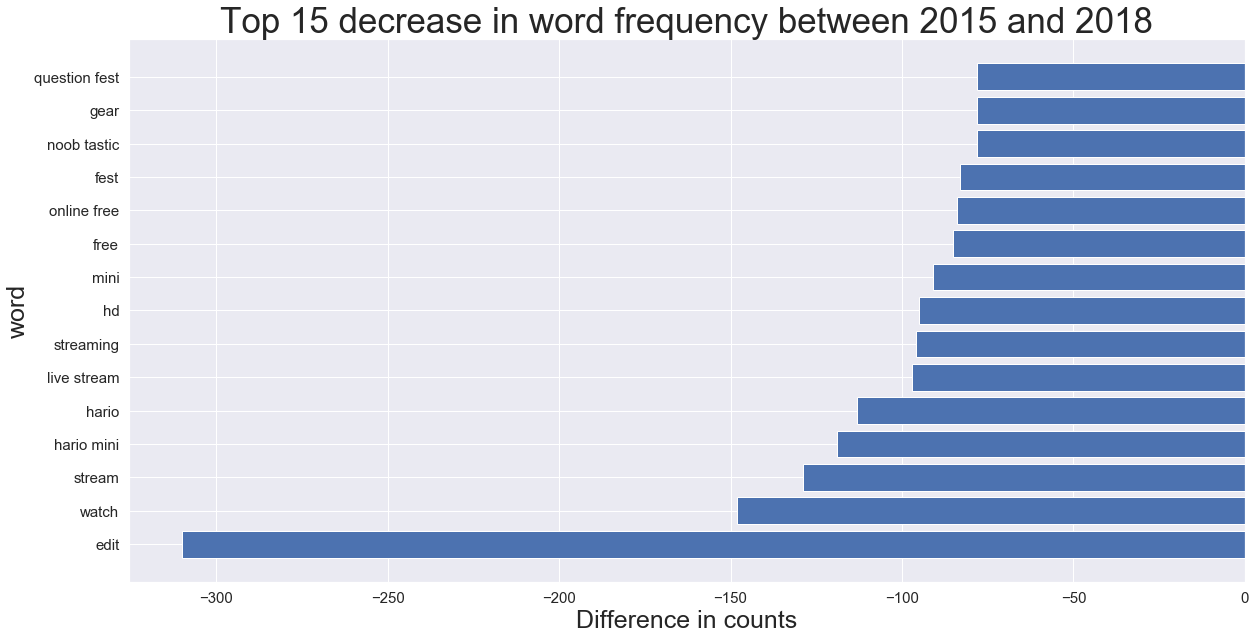

In [75]:
plt.figure(figsize=(20,10))
temp = diff_df.sort_values('diff', ascending=True).head(15)
plt.barh(temp.index, temp['diff'])
plt.title('Top 15 decrease in word frequency between 2015 and 2018', fontsize=35)
plt.xlabel('Difference in counts', fontsize=25)
plt.ylabel('word', fontsize=25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

This seems to convey a strong message. The above difference in count charts From EDA, I can see that there is interesting change between the year 2015 and 2017 in the coffee subreddit, mainly the decrease in word frequency of hario and hario mini. This finding should be kept in mind during analysis. From the above EDA, I have reason to believe that there may be enough signal that a statistical model will pick up and generate a convincing story.

Modeling will be performed, however, on the TF-IDF'ed dataframe as it promotes rarer words and 'penalizes' common words. This is beneficial because words that occur often in one document/post but do not occur in many other documents among my corpus contain a great deal of discriminating power and inserts noise.

Save out the csv with cleaned and explored dataset for modeling

In [76]:
df_all.to_csv('../datasets/df_all.csv')